# Housing Prices in Mumbai Estimator

## Hitaansh Shah - 21d180016
## Ojas Karanjkar - 210070040
## Omkar Nitsure - 210070057

In [259]:
import numpy as np                      # Importing Essential libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

import statistics as st

## Reading csv file into a DataFrame

In [260]:
url = r"C:\Users\omkar\Downloads\house-price-mumbai.csv"
#url = r"C:\Users\OJAS\Downloads\house-price-mumbai.csv"
#url= "/Users/hitaanshshah/Downloads/DS203-PROJECT-main/house-price-mumbai.csv"
df = pd.read_csv(url)

display(df)

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr
...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L


## Exploratory Data Analysis

### Dropping Redundant Column

In [261]:
df.drop('City', axis=1,inplace=True)

display(df)

,BHK,project,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,"5,245",32 L


### Finding the total number of rows and columns in the csv data file

In [262]:
no_of_rows = df.shape[0]

no_of_columns = df.shape[1]

print('Dataframe number of rows = '+str(no_of_rows))
print('Dataframe number of columns = '+str(no_of_columns))

Dataframe number of rows = 3980
Dataframe number of columns = 6


### Replacing nan values with zero and categorising houses in 1, 2, 3, 4, 5, 6 BHK

In [263]:
df = df.replace(np.nan, 0)          # Replacing nan values

df = df.replace('1 BHK Apartment', 1)       # Replacing the house label by a number indicating the number of BHK

df = df.replace('1 RK Studio Apartment', 1)

df = df.replace('2 RK Studio Apartment', 1)

df = df.replace('1 BHK Independent House', 1)

df = df.replace('2 BHK Apartment', 2)

df = df.replace('2 BHK Independent Floor', 2)

df = df.replace('2 BHK Independent House', 2)

df = df.replace('3 BHK Apartment', 3)

df = df.replace('3 BHK Independent House', 3)

df = df.replace('3 BHK Independent Floor', 3)

df = df.replace('3 BHK Villa', 3)

df = df.replace('4 BHK Apartment', 4)

df = df.replace('5 BHK Apartment', 5)

df = df.replace('5 BHK Independent House', 5)

df = df.replace('5 BHK Independent Floor', 5)

df = df.replace('6 BHK Apartment', 6)

df = df.replace('6 BHK Independent Floor', 6)

df = df.replace('R', 6)

### Removing commas in 'price_sqft' column and changing it's datatype

In [264]:
df_ = df['price_sqft'].to_list()                # The elements of column price_sqft are now numbers which can be used for any mathematics
df.drop('price_sqft', axis=1,inplace=True)

for i in range(0,len(df_)):
    df_[i] = df_[i].replace(',', '')


df['price_sqft'] = df_

df['price_sqft'] = pd.to_numeric(df['price_sqft'])

display(df)

,BHK,project,Location,Total sqft,price,price_sqft
0,3,SHREE KRISHNA SangamChembur,Chembur,984,3.05 Cr,31000
1,2,Ekdanta 24 KaratKurla,Kurla,598,1.42 Cr,23913
2,2,Liberty Bay VueMalad West,Malad West,738,1.54 Cr,21000
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,68.75 L,10676
4,2,Mayfair The ViewVikhroli,Vikhroli,582,1.45 Cr,24914
...,...,...,...,...,...,...
3975,2,Global Prestige Wing EVasai,Vasai,966,48 L,4968
3976,1,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,26 L,5200
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,34 L,5573
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,32 L,5245


### Finding total prices in Crores and changing Datatype of the column

In [265]:
df.drop('price', axis=1,inplace=True)       # Writing the total price of the house in Crores approximated to the 2nd decimal place and appending it to the column

Total_sqft = df['Total sqft'].to_list()
price_sqft = df['price_sqft'].to_list()

price_in_Cr = []  

for index in range(0, no_of_rows):
    price_in_Cr.append(round(Total_sqft[index]*price_sqft[index]/10**7, 2))

df['price_in_Cr'] = price_in_Cr

display(df)

,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,3.05
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,1.43
2,2,Liberty Bay VueMalad West,Malad West,738,21000,1.55
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,0.69
4,2,Mayfair The ViewVikhroli,Vikhroli,582,24914,1.45
...,...,...,...,...,...,...
3975,2,Global Prestige Wing EVasai,Vasai,966,4968,0.48
3976,1,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,5200,0.26
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,5573,0.34
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,5245,0.32


### Creating separate Dataframes for different BHK's

In [266]:
df_BHK1 = df[df['BHK'] == 1]
df_BHK2 = df[df['BHK'] == 2]
df_BHK3 = df[df['BHK'] == 3]
df_BHK4 = df[df['BHK'] == 4]
df_BHK5 = df[df['BHK'] == 5]
df_BHK6 = df[df['BHK'] == 6]

### Finding Average price per sqft in Mumbai

In [267]:
Avg_price_sqft = np.mean(price_sqft)

print('Average price per sqft in Mumbai is ' + str(round(Avg_price_sqft/1000, 2)) + ' Thousand Rupees')

Average price per sqft in Mumbai is 11.94 Thousand Rupees


### Average total price of house with different BHK in Mumbai

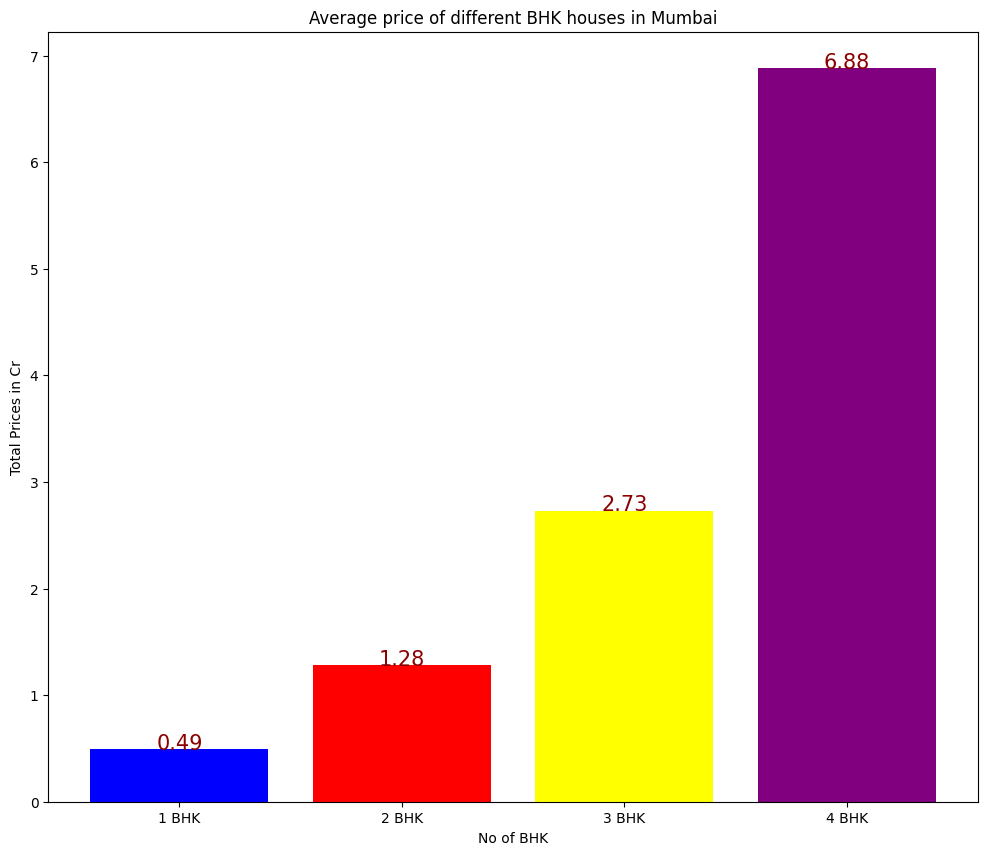

In [268]:
BHK = ['1 BHK', '2 BHK', '3 BHK', '4 BHK']                    # xlabels of barplots

avg_price = [round(np.mean(df_BHK1['price_in_Cr']), 2), round(np.mean(df_BHK2['price_in_Cr']), 2), round(np.mean(df_BHK3['price_in_Cr']), 2), round(np.mean(df_BHK4['price_in_Cr']), 2)]        # Heights of plots

plt.figure(figsize=(12,10))

plt.bar(BHK, avg_price, color=['Blue','Red','Yellow', 'Purple'])

plt.xlabel('No of BHK')

plt.ylabel('Total Prices in Cr')

plt.title('Average price of different BHK houses in Mumbai')


for index in range(len(BHK)):
    plt.text(index, avg_price[index], avg_price[index], ha='center', color='darkred',size=15)

plt.show()

### Plotting the average area in different BHK flats in Mumbai

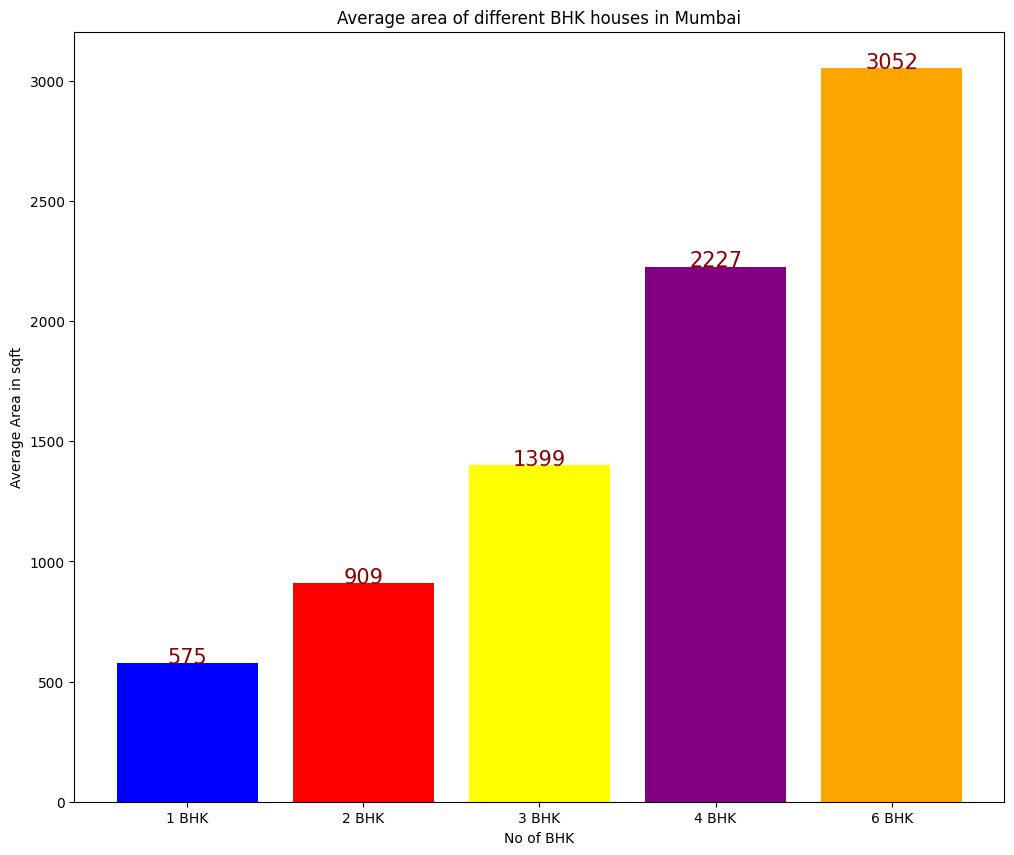

In [269]:
BHK = ['1 BHK', '2 BHK', '3 BHK', '4 BHK', '6 BHK']

area_BHK = [np.mean(df_BHK1['Total sqft']), np.mean(df_BHK2['Total sqft']), np.mean(df_BHK3['Total sqft']), np.mean(df_BHK4['Total sqft']), np.mean(df_BHK6['Total sqft'])]     # Heights of plots

plt.figure(figsize=(12,10))

plt.bar(BHK, area_BHK, color=['Blue','Red','Yellow', 'Purple', 'orange'])

plt.xlabel('No of BHK')

plt.ylabel('Average Area in sqft')

plt.title('Average area of different BHK houses in Mumbai')


for index in range(len(BHK)):
    plt.text(index, int(area_BHK[index]), int(area_BHK[index]), ha='center', color='darkred',size=15)

plt.show()

### Plotting total number of houses of different BHK in Mumbai

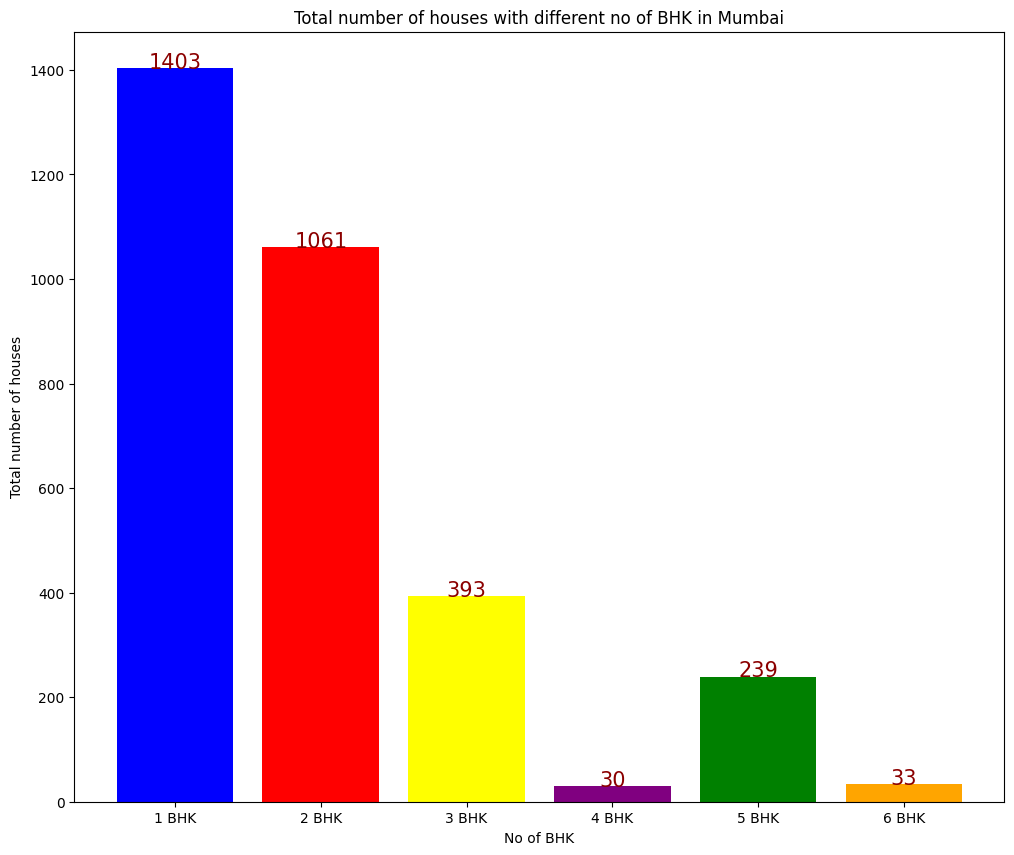

In [270]:
BHK = ['1 BHK', '2 BHK', '3 BHK', '4 BHK', '5 BHK', '6 BHK']

no_of_houses = [len(df_BHK1['BHK']), len(df_BHK2['BHK']), len(df_BHK3['BHK']), len(df_BHK4['BHK']), len(df_BHK5['BHK']), len(df_BHK6['BHK'])]       # Heights of plots

plt.figure(figsize=(12,10))

plt.bar(BHK, no_of_houses, color=['Blue','Red','Yellow', 'Purple', 'Green', 'orange'])

plt.xlabel('No of BHK')

plt.ylabel('Total number of houses')

plt.title('Total number of houses with different no of BHK in Mumbai')


for index in range(len(BHK)):
    plt.text(index, no_of_houses[index], no_of_houses[index], ha='center', color='darkred',size=15)

plt.show()

### Plotting barplot of number of houses for every price range in Mumbai

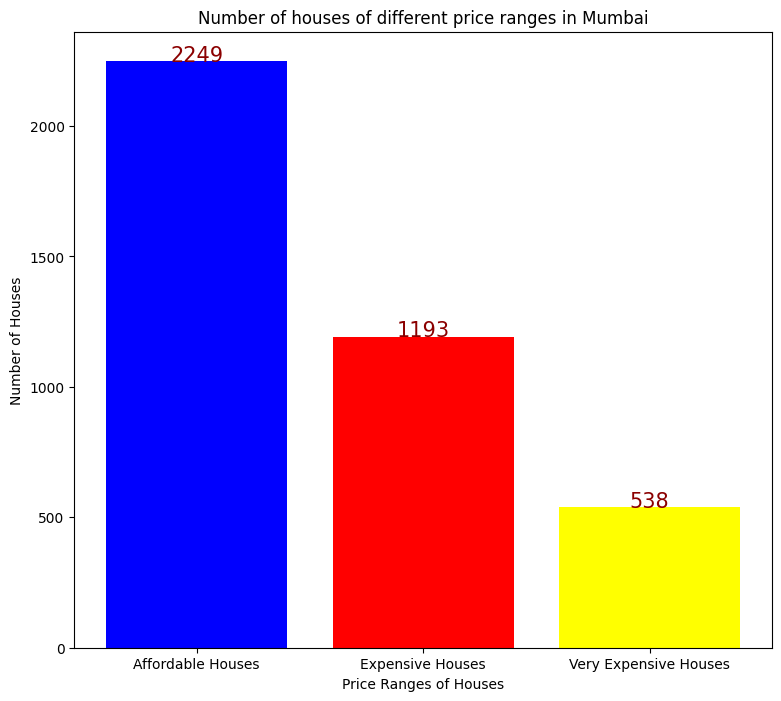

Mean price of houses in Mumbai is 1.12 Crore Rupees
Deviation in prices of houses in Mumbai is 1.71 Crore Rupees


In [271]:
affordable_houses = 0
expensive_houses = 0
very_expensive_houses = 0

price = df['price_in_Cr'].to_list()

mean_price = np.mean(price)
std_price = np.std(price)

# 75 lakh considered as the upper limit for affordable houses
# 2 crores is considered as the upper limit for the expensive houses
for index in range(0, len(price)):
    if price[index] <= 0.75:
        affordable_houses += 1
    elif (price[index] > 0.75) and (price[index] <= 2.0):
        expensive_houses += 1
    else:
        very_expensive_houses += 1

price_categories = ['Affordable Houses', 'Expensive Houses', 'Very Expensive Houses']       # Xlabels

frequency = [affordable_houses, expensive_houses, very_expensive_houses]            # Heights of plots
plt.figure(figsize=(9,8))

plt.bar(price_categories, frequency, color=['Blue','Red','Yellow'])         # Drawing the barplot

plt.xlabel('Price Ranges of Houses')

plt.ylabel('Number of Houses')

plt.title('Number of houses of different price ranges in Mumbai')


for index in range(len(price_categories)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean price of houses in Mumbai is ' + str(round(mean_price, 2)) + ' Crore Rupees')           # Printing various results

print('Deviation in prices of houses in Mumbai is ' + str(round(std_price, 2)) + ' Crore Rupees')

### Plotting barplot of number of houses of different sizes in Mumbai

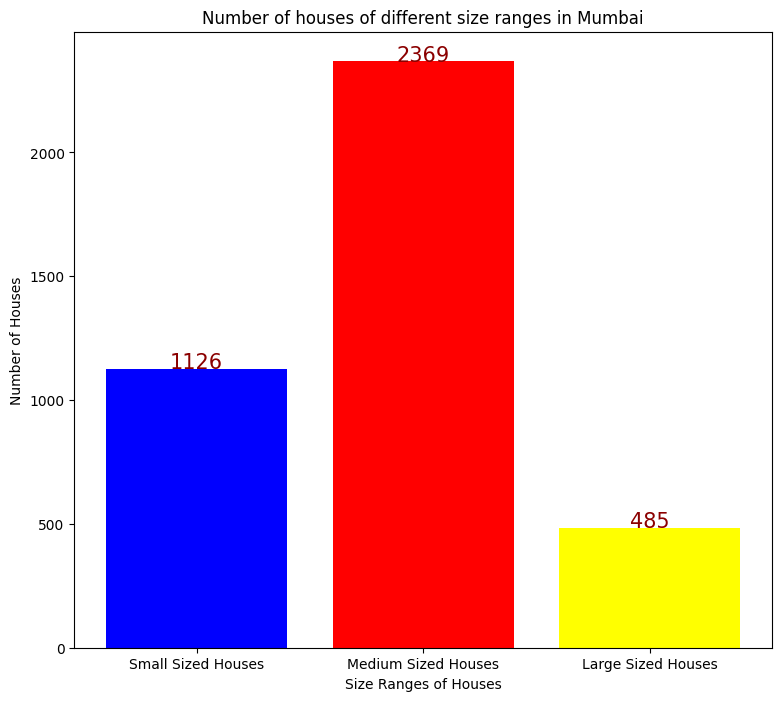

Mean size of houses in Mumbai is 895 sqft
Deviation in size of houses in Mumbai is 689 sqft


In [272]:
small_houses = 0
medium_houses = 0
large_houses = 0

house_size = df['Total sqft'].to_list()

mean_size = np.mean(house_size)
std_size = np.std(house_size)


# 600 sqft considered as the upper limit for small houses
# 1500 sqft considered as the upper limit for medium sized houses
for index in range(0, len(house_size)):
    if house_size[index] <= 600:
        small_houses += 1
    elif (house_size[index] > 600) and (house_size[index] <= 1500):
        medium_houses += 1
    else:
         large_houses += 1

house_size = ['Small Sized Houses', 'Medium Sized Houses', 'Large Sized Houses']        # Xlabels

frequency = [small_houses, medium_houses, large_houses]             # Heights of barplots
plt.figure(figsize=(9,8))
plt.bar(house_size, frequency, color=['Blue','Red','Yellow'])       # Drawing the barplot

plt.xlabel('Size Ranges of Houses')

plt.ylabel('Number of Houses')

plt.title('Number of houses of different size ranges in Mumbai')

for index in range(len(house_size)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean size of houses in Mumbai is ' + str(round(mean_size)) + ' sqft')            # Printing Various results

print('Deviation in size of houses in Mumbai is ' + str(round(std_size)) + ' sqft')

### Plotting barplot of number of houses with different prices/sqft in Mumbai

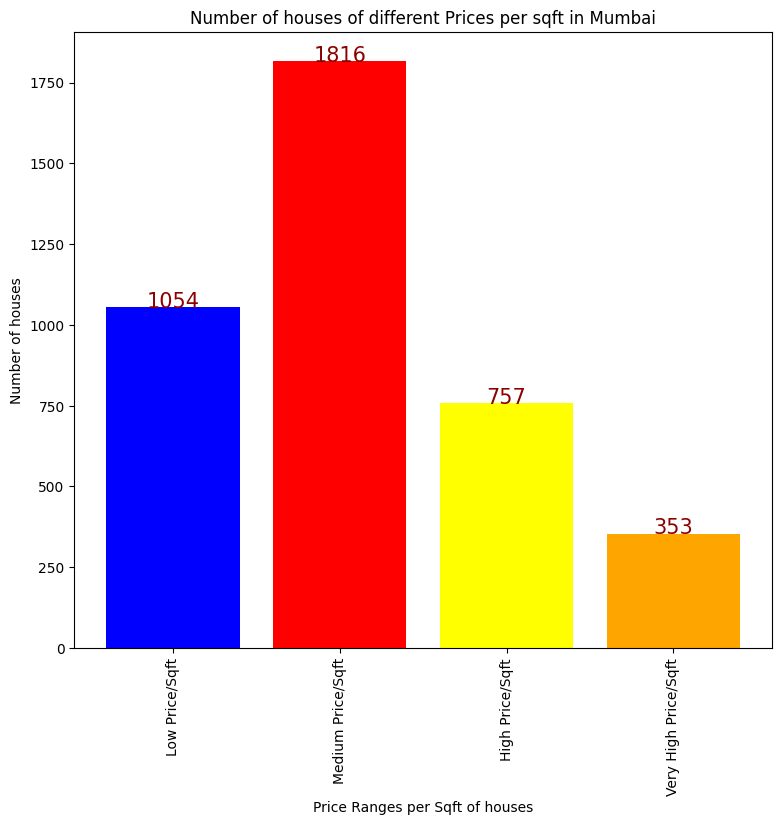

Mean price/sqft in Mumbai is 11938 Rupees
Deviation in price/sqft in Mumbai is 10153 Rupees


In [273]:
low_price_sqft = 0
medium_price_sqft = 0
high_price_sqft = 0
very_high_price_sqft = 0

mean_price_sqft = np.mean(price_sqft)
std_price_sqft = np.std(price_sqft)


# 5000 Rs/sqft considered as the upper limit for the low price per sqft criteria
# 15000 Rs/sqft considered as the upper limit for the Medium price per sqft criteria
# 25000 Rs/sqft considered as the upper limit for the high price per sqft criteria
# All prices above Rs 25000 are considered very expensive per sqft
for index in range(0, len(price_sqft)):
    if price_sqft[index] <= 5000:
        low_price_sqft += 1
    elif (price_sqft[index] > 5000) and (price_sqft[index] <= 15000):
        medium_price_sqft += 1
    elif (price_sqft[index] > 15000) and (price_sqft[index] <= 25000):
        high_price_sqft += 1
    else:
        very_high_price_sqft += 1

price_sqft_categories = ['Low Price/Sqft', 'Medium Price/Sqft', 'High Price/Sqft', 'Very High Price/Sqft']      # Xlabels

frequency = [low_price_sqft, medium_price_sqft, high_price_sqft, very_high_price_sqft]          # Heights of barplots
plt.figure(figsize=(9,8))
plt.bar(price_sqft_categories, frequency, color=['Blue','Red','Yellow','Orange'])       # Drawing the barplot

plt.xlabel('Price Ranges per Sqft of houses')

plt.xticks(rotation=90)

plt.ylabel('Number of houses')

plt.title('Number of houses of different Prices per sqft in Mumbai')

for index in range(len(price_sqft_categories)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean price/sqft in Mumbai is ' + str(round(mean_price_sqft)) + ' Rupees')        # Printing the results

print('Deviation in price/sqft in Mumbai is ' + str(round(std_price_sqft)) + ' Rupees')

### Classifying Location in broad Regions

In [274]:
North_Mumbai = ['Malad West', 'Palghar', 'Malad East', 'Jogeshwari West', 'Dahisar', 'Borivali East', 'Vasai', 'Andheri West', 'Goregaon East','Andheri East','Umroli','Virar','Kandivali West','Mira Road East','Vasai east','Wada','Santosh Nagar','Virar East','Gorai','Virar West','Nala Sopara','Vasai West','Borivali West','Goregaon West','Bandra West','Nalasopara West','Bhayandar West','Boisar','Bhayandar East','Jogeshwari East','Uttan','Kandivali East','Vevoor','Nalasopara East','Ville Parle East','Dahisar East','Juhu','Dahisar West','Bandra East','Naigaon West','Naigaon East','Khar West','Saphale','Shir Gaon','Dahanu','Kharodi','Bandra Kurla Complex','Khar']
South_Mumbai = ['Colaba','Agripada','Mandvi','Kamathipura','Parel','Girgaon','Mumbai Central','Napeansea Road','Prabhadevi','Cuffe Parade','Lower Parel','Peddar Road','Worli','Madanpura','Bhuleshwar','Fort']
Central_Mumbai = ['Kurla','Vikhroli','Mahim','Dombivali','Mulund West','Ambernath East','Karjat','Khopoli','Kalyan West','Kalyan East','Thane West','Shahapur','Badlapur East','Titwala','Diva','Bhiwandi','Powai','Badlapur West','kasaradavali thane west','Dombivali East','Dadar East','Sion','Kalwa','Hendre Pada','Kumbharkhan Pada','Ghatkopar West','Khadawali','Mulund East','Kanjurmarg','Anjurdive','matunga east','Dharamveer Nagar','Diva Gaon','Dombivli (West)','Thakurli','Bhandup West','Vikhroli West','Ghatkopar East','Kanjurmarg East','Kurla West','Palava','New Balaji Nagar','Vasind','Ambivli','Navapada','Kurla East','Ambernath West','Dadar West','Vishnu Nagar','Nilje Gaon','Vikroli East','Beturkar Pada','Ghodbander','Datiwali Gaon','Shil Phata','Vashi','Ulhasnagar','LBS Marg','Hiranandani Estates','Bhandup East','Atgaon','Nahur East','Usarghar Gaon','Kasheli','Thane East']
Harbour_Mumbai = ['Chembur','Kharghar','Santacruz East','Mazagaon','Panvel','Santacruz West','Mazgaon','Belapur','Sanpada','Sewri','Byculla','Wadala','Masjid Bandar','Deonar','Matunga','Dighe']
Navi_Mumbai = ['Rasayani','Dronagiri','Taloja','Ulwe','Kamothe','Nerul','Kalamboli','Karanjade','Navade','Airoli','Vichumbe','Belondakhar','Koper Khairane','Taloje','Dundare','Pale Bk.','Seawoods','Greater Khanda','Koproli','Ranjanpada Uran Panvel Road','Rabale','Ghansoli','Dahisar Navi mumbai','Sarde','Sector-20 Koparkhairane']
Raigadh = ['Vangani','Bhangarwadi','Shelu','Neral']

Carefully segregated all areas manually into six specific regions.

### Creating separate DataFrames for individual Broad Regions

In [275]:
df_NM = pd.DataFrame()
df_SM = pd.DataFrame()
df_CM = pd.DataFrame()
df_HM = pd.DataFrame()
df_NvM = pd.DataFrame()
df_R = pd.DataFrame()


for areas in North_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_NM = pd.concat([df_NM, df_temp])

for areas in South_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_SM = pd.concat([df_SM, df_temp])

for areas in Central_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_CM = pd.concat([df_CM, df_temp])

for areas in Harbour_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_HM = pd.concat([df_HM, df_temp])

for areas in Navi_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_NvM = pd.concat([df_NvM, df_temp])

for areas in Raigadh:
    df_temp = df[df['Location'] == areas]
    df_R = pd.concat([df_R, df_temp])

Regions = ['North Mumbai', 'South Mumbai', 'Central Mumbai', 'Harbour Mumbai', 'Navi Mumbai', 'Raigadh']        # List with names of all regions
DataFrames = [df_NM, df_SM, df_CM, df_HM, df_NvM, df_R]         # List with all the Dataframes of the above mentioned regions

for index in range(0, len(Regions)):
    print('DataFrame for the Region ' + Regions[index] + ' :-')
    display(DataFrames[index])

DataFrame for the Region North Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
2,2,Liberty Bay VueMalad West,Malad West,738,21000,1.55
44,1,Sudarshan Sudarshan Lands EndMalad West,Malad West,469,19190,0.90
71,3,Liberty Bay VueMalad West,Malad West,999,21000,2.10
134,3,Liberty Bay VueMalad West,Malad West,1150,21000,2.42
135,1,Liberty Bay VueMalad West,Malad West,501,21000,1.05
...,...,...,...,...,...,...
2955,3,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,986,37018,3.65
2956,2,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,857,36989,3.17
2957,2,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,845,36923,3.12
2777,3,Paradigm NivanKhar,Khar,1550,37741,5.85


DataFrame for the Region South Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
263,1,0,Colaba,635,37795,2.40
596,1,0,Colaba,600,31666,1.90
1230,2,0,Colaba,1000,25000,2.50
1354,2,0,Colaba,1000,25000,2.50
272,1,0,Agripada,765,16993,1.30
...,...,...,...,...,...,...
3605,3,Vraj TiaraWorli,Worli,1500,46666,7.00
2703,3,Reputed Builder Sagar ClassicMadanpura,Madanpura,1650,28303,4.67
3414,1,0,Bhuleshwar,577,23396,1.35
7,2,Aplite Greenstone HeritageFort,Fort,671,40536,2.72


DataFrame for the Region Central Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,1.43
14,1,Hirani Nehru Nagar Shree Ganesh Krupa CHS Ltd ...,Kurla,425,21591,0.92
70,1,Ekdanta 24 KaratKurla,Kurla,476,21968,1.05
79,2,Hirani Nehru Nagar Shree Ganesh Krupa CHS Ltd ...,Kurla,540,21425,1.16
133,1,Ekdanta 24 KaratKurla,Kurla,447,21973,0.98
...,...,...,...,...,...,...
3389,2,Neelam Senroofs Phase IIINahur East,Nahur East,838,20883,1.75
3295,2,Reputed Builder Regalia Casa BellaUsarghar Gaon,Usarghar Gaon,748,6149,0.46
3298,2,Ajay Bhav ResidencyKasheli,Kasheli,730,4041,0.29
3394,1,Godrej AscendThane East,Thane East,589,12903,0.76


DataFrame for the Region Harbour Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,3.05
41,1,Vardhan HeightsChembur,Chembur,320,21844,0.70
68,2,RRB Satra HarmonyChembur,Chembur,522,25692,1.34
69,3,SHREE KRISHNA SangamChembur,Chembur,917,31000,2.84
122,2,RRB Satra HarmonyChembur,Chembur,834,25692,2.14
...,...,...,...,...,...,...
875,1,0,Masjid Bandar,410,17073,0.70
1022,1,0,Masjid Bandar,410,17073,0.70
1498,1,Vinod Kisan ViharDeonar,Deonar,550,7254,0.40
1530,3,Raj Riddhi ResidencyMatunga,Matunga,1300,30692,3.99


DataFrame for the Region Navi Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,0.69
65,1,Today Belantara Rasayani,Rasayani,343,6851,0.23
72,1,Thalia Vrindavan FloraRasayani,Rasayani,320,8830,0.28
114,1,Today Belantara Rasayani,Rasayani,302,7052,0.21
115,2,Today Belantara Rasayani,Rasayani,514,6614,0.34
...,...,...,...,...,...,...
3588,6,0,Sarde,1089,367,0.04
3589,6,0,Sarde,1089,459,0.05
3930,6,0,Sarde,1089,321,0.03
3682,3,Sai Proviso ApartmentSector-20 Koparkhairane,Sector-20 Koparkhairane,1524,12467,1.90


DataFrame for the Region Raigadh :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
11,1,A Plus Golden VanVangani,Vangani,417,2578,0.11
24,1,Royal HeritageVangani,Vangani,395,4306,0.17
77,2,A Plus Golden VanVangani,Vangani,489,2699,0.13
177,1,A Plus Golden VanVangani,Vangani,241,2701,0.07
238,1,Royal HeritageVangani,Vangani,410,4243,0.17
275,1,Aries Aries Vangani HeightVangani,Vangani,450,19777,0.89
471,1,Royal HeritageVangani,Vangani,470,4255,0.20
472,2,Royal HeritageVangani,Vangani,553,4204,0.23
343,1,0,Bhangarwadi,674,4154,0.28
580,1,0,Shelu,520,2500,0.13


### Plotting Pieplots of number of houses for every price range in various Regions

Pie plot for the number of houses in different price ranges in Region North Mumbai :-
Mean price of houses in North Mumbai is 1.08 Crore Rupees
Deviation in prices of houses in North Mumbai is 1.99 Crore Rupees


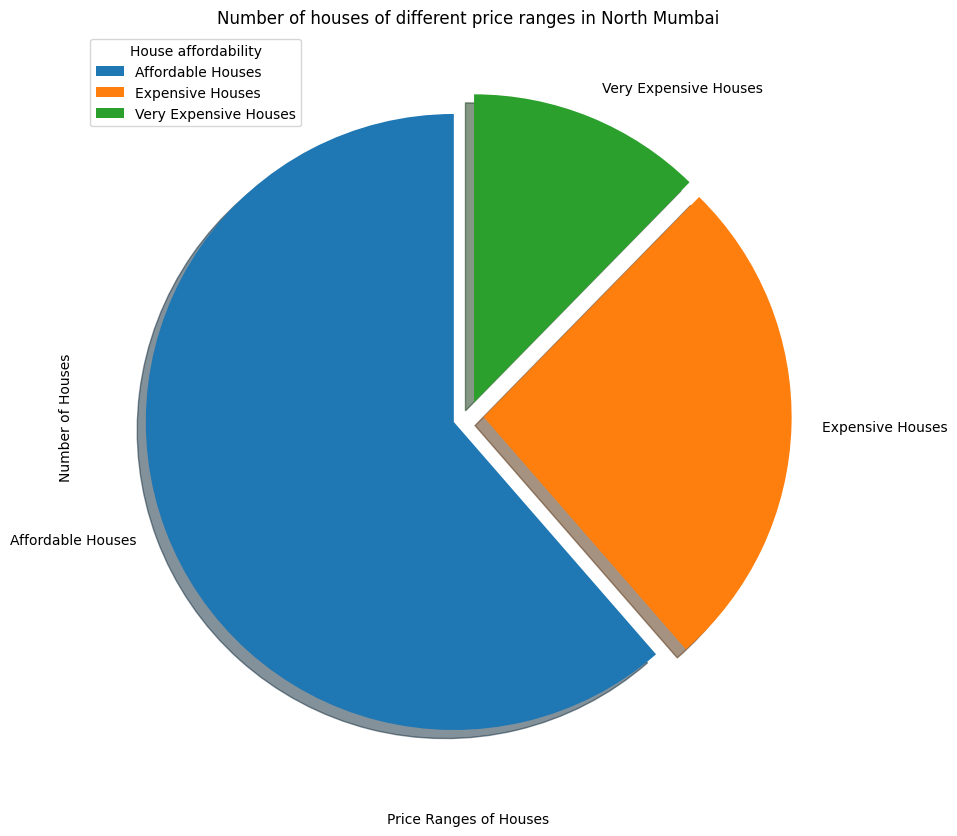

Pie plot for the number of houses in different price ranges in Region South Mumbai :-
Mean price of houses in South Mumbai is 4.95 Crore Rupees
Deviation in prices of houses in South Mumbai is 3.31 Crore Rupees


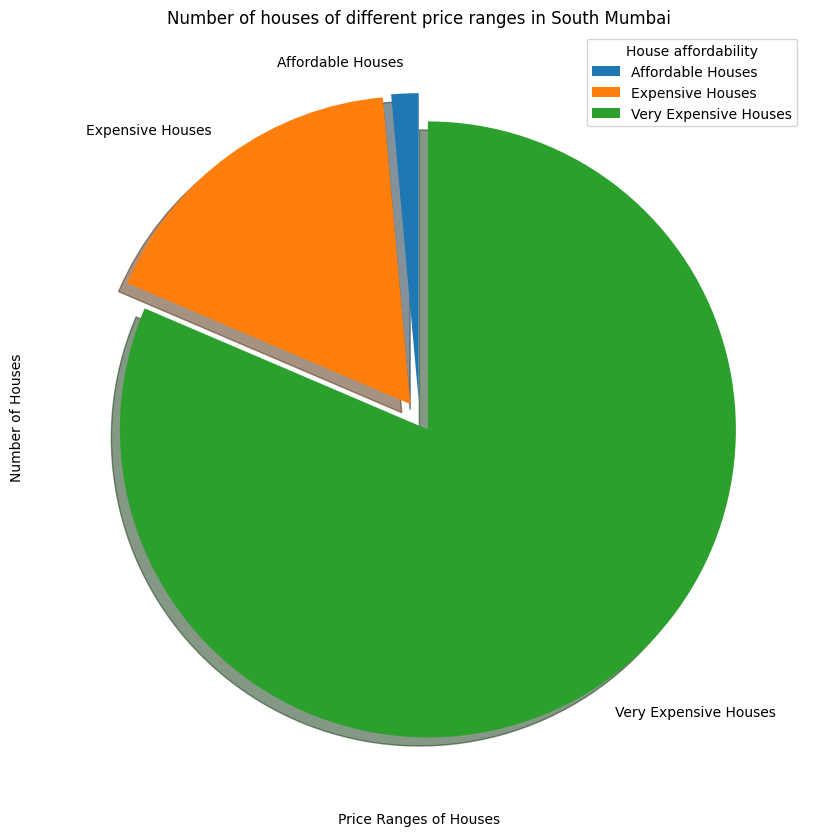

Pie plot for the number of houses in different price ranges in Region Central Mumbai :-
Mean price of houses in Central Mumbai is 0.89 Crore Rupees
Deviation in prices of houses in Central Mumbai is 0.91 Crore Rupees


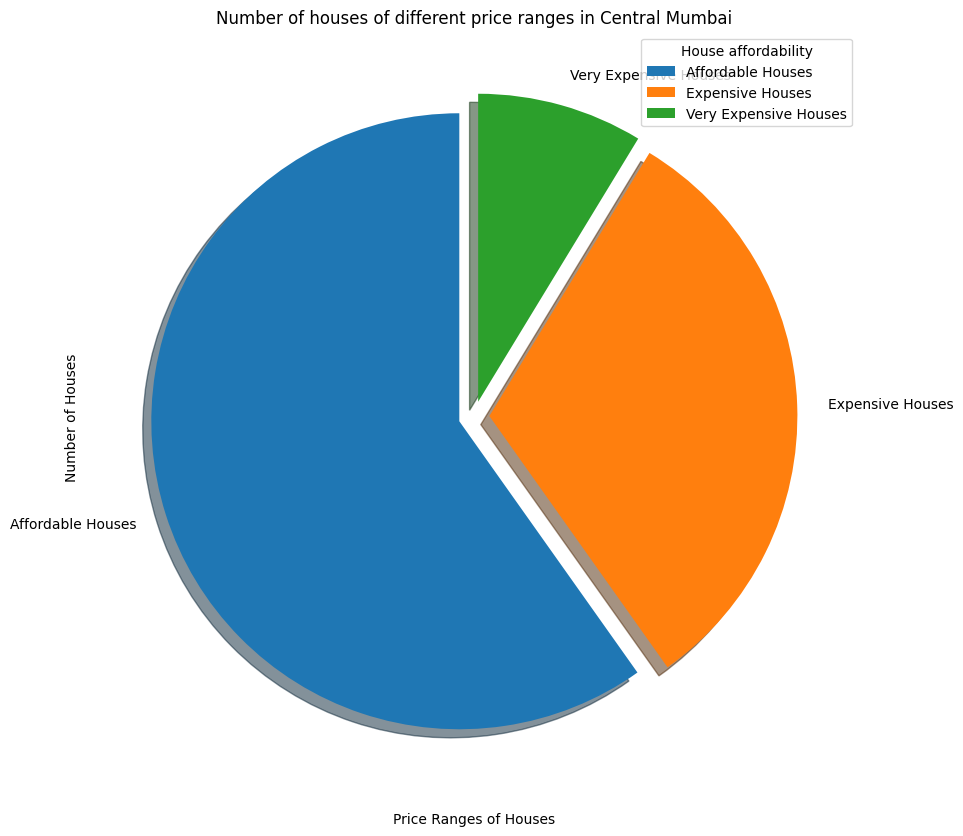

Pie plot for the number of houses in different price ranges in Region Harbour Mumbai :-
Mean price of houses in Harbour Mumbai is 1.8 Crore Rupees
Deviation in prices of houses in Harbour Mumbai is 1.56 Crore Rupees


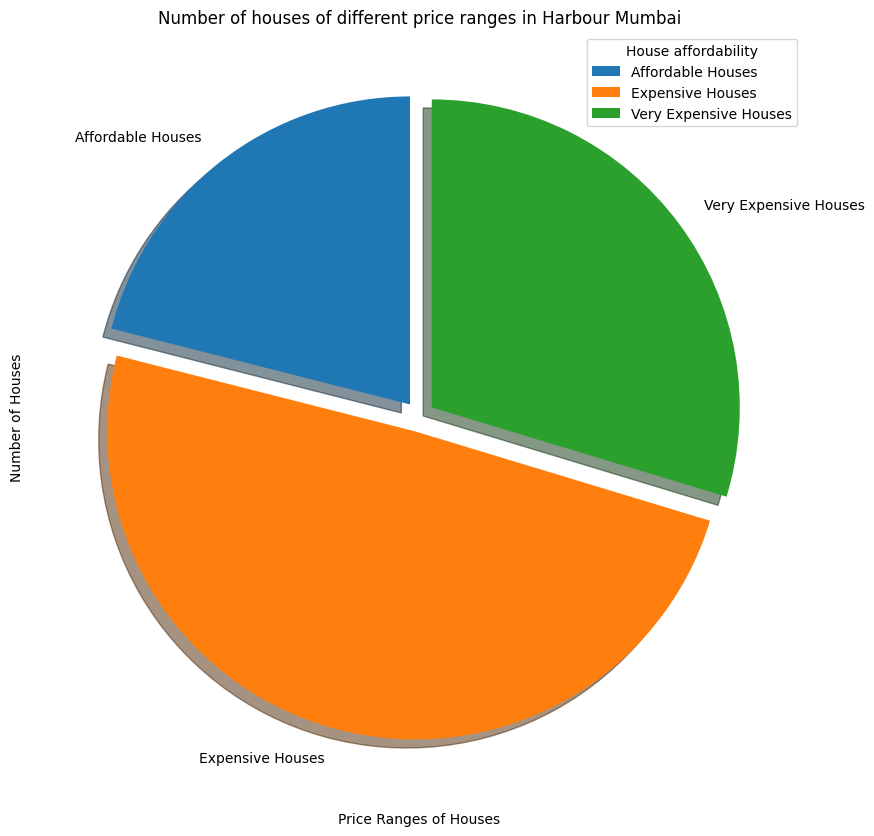

Pie plot for the number of houses in different price ranges in Region Navi Mumbai :-
Mean price of houses in Navi Mumbai is 0.87 Crore Rupees
Deviation in prices of houses in Navi Mumbai is 0.77 Crore Rupees


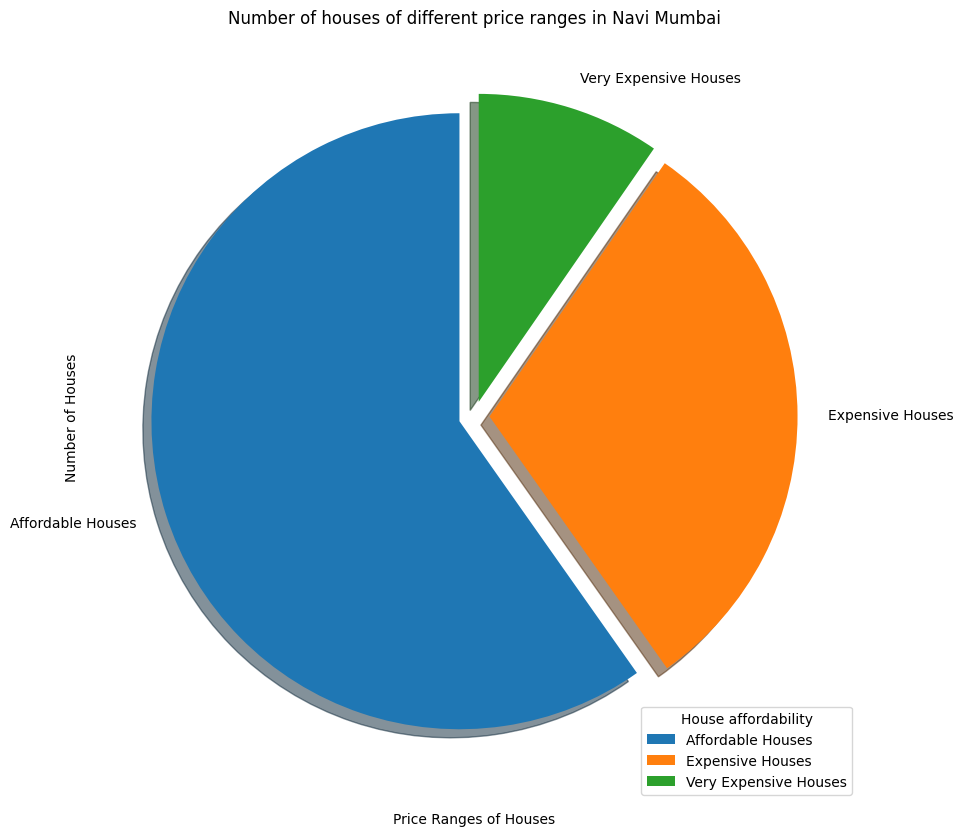

Pie plot for the number of houses in different price ranges in Region Raigadh :-
Mean price of houses in Raigadh is 0.24 Crore Rupees
Deviation in prices of houses in Raigadh is 0.18 Crore Rupees


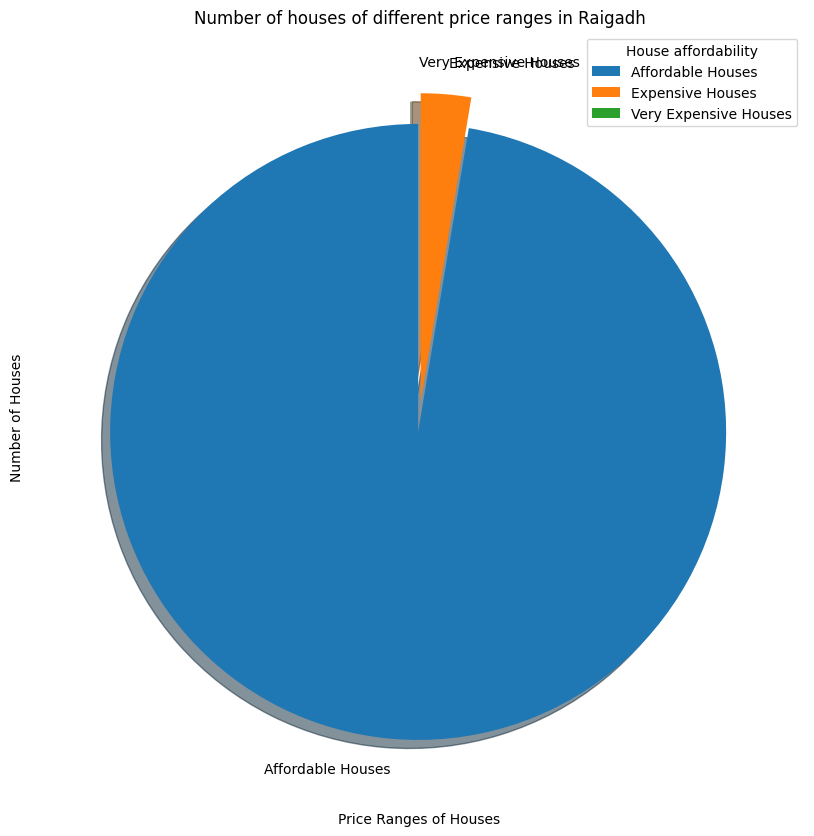

In [276]:
for index1 in range(0, len(Regions)):

    affordable_houses = 0
    expensive_houses = 0
    very_expensive_houses = 0

    price = DataFrames[index1]['price_in_Cr'].to_list()

    mean_price = np.mean(price)
    std_price = np.std(price)

    for index2 in range(0, len(price)):
        if price[index2] <= 0.75:            # 0.75 Cr as the maximum limit for affordable houses
            affordable_houses += 1
        elif (price[index2] > 0.75) and (price[index2] <= 2.0):  # 2 Cr as the maximum limit for expensive houses
            expensive_houses += 1
        else:
            very_expensive_houses += 1

    price_categories = ['Affordable Houses', 'Expensive Houses', 'Very Expensive Houses']       # Xlabels

    frequency = [affordable_houses, expensive_houses, very_expensive_houses]        # Heights of barplots

    print('Pie plot for the number of houses in different price ranges in Region ' + Regions[index1] + ' :-')           # Printing the results

    print('Mean price of houses in ' + Regions[index1] + ' is ' + str(round(mean_price, 2)) + ' Crore Rupees')

    print('Deviation in prices of houses in ' + Regions[index1] + ' is ' + str(round(std_price, 2)) + ' Crore Rupees')

    plt.figure(figsize=(10,10))
    myexplode = [0.05,0.05,0.05]
 
    plt.pie(frequency,labels=price_categories,explode=myexplode,shadow=True, startangle=90)

    plt.xlabel('Price Ranges of Houses')

    plt.ylabel('Number of Houses')

    plt.title('Number of houses of different price ranges in ' + Regions[index1])

    plt.legend(title="House affordability")

    plt.show()

### Plotting barplots of number of houses in various Regions

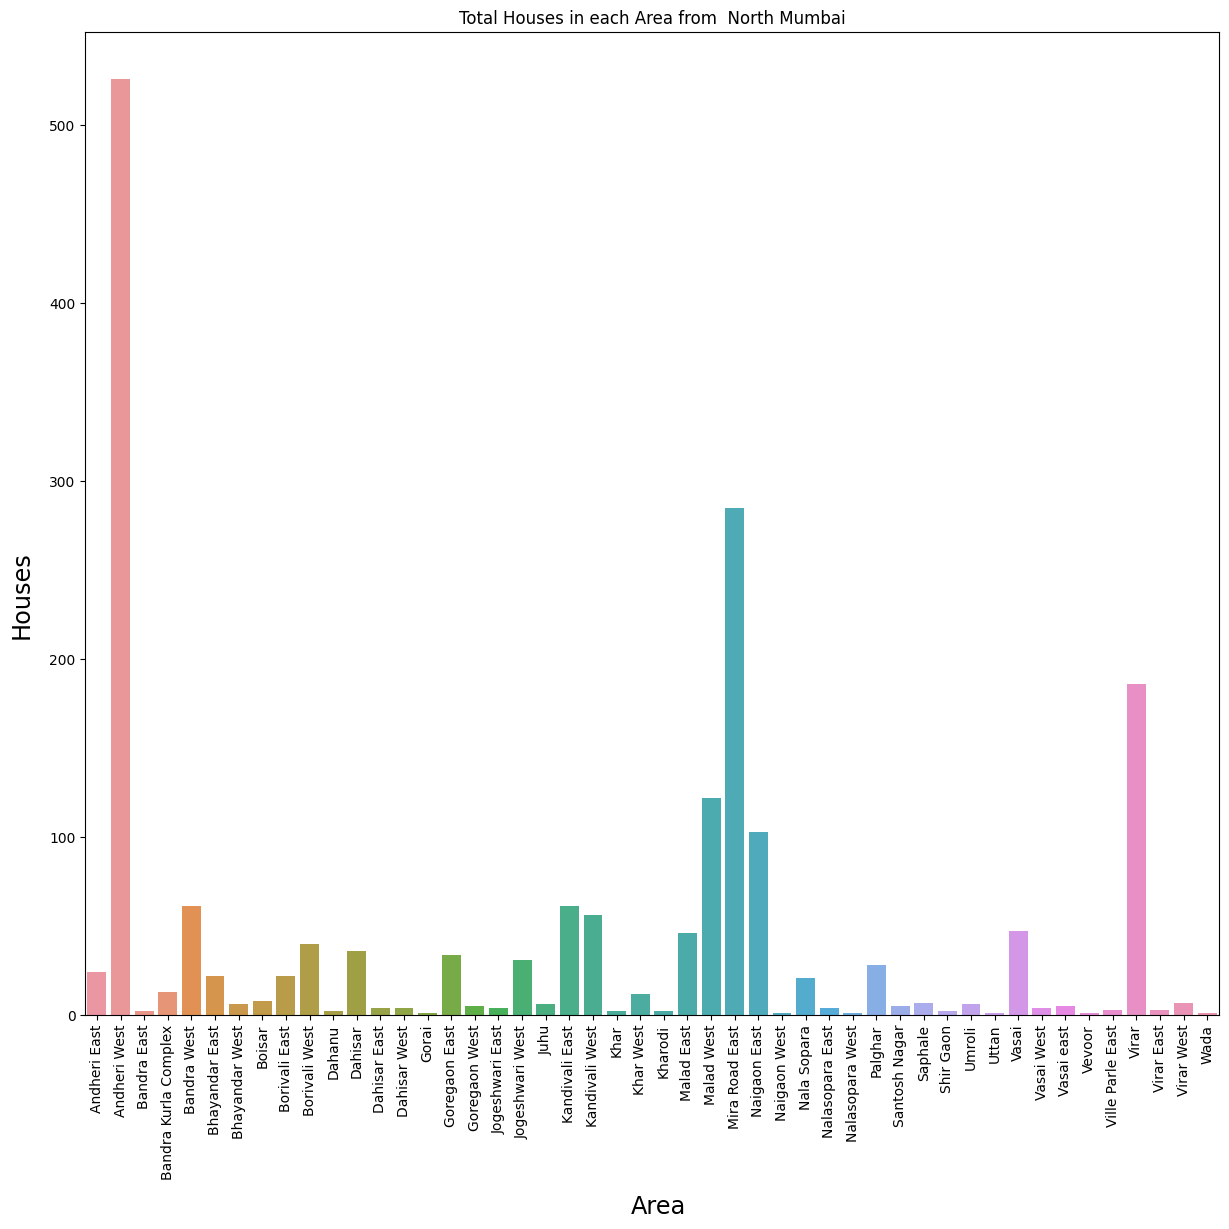

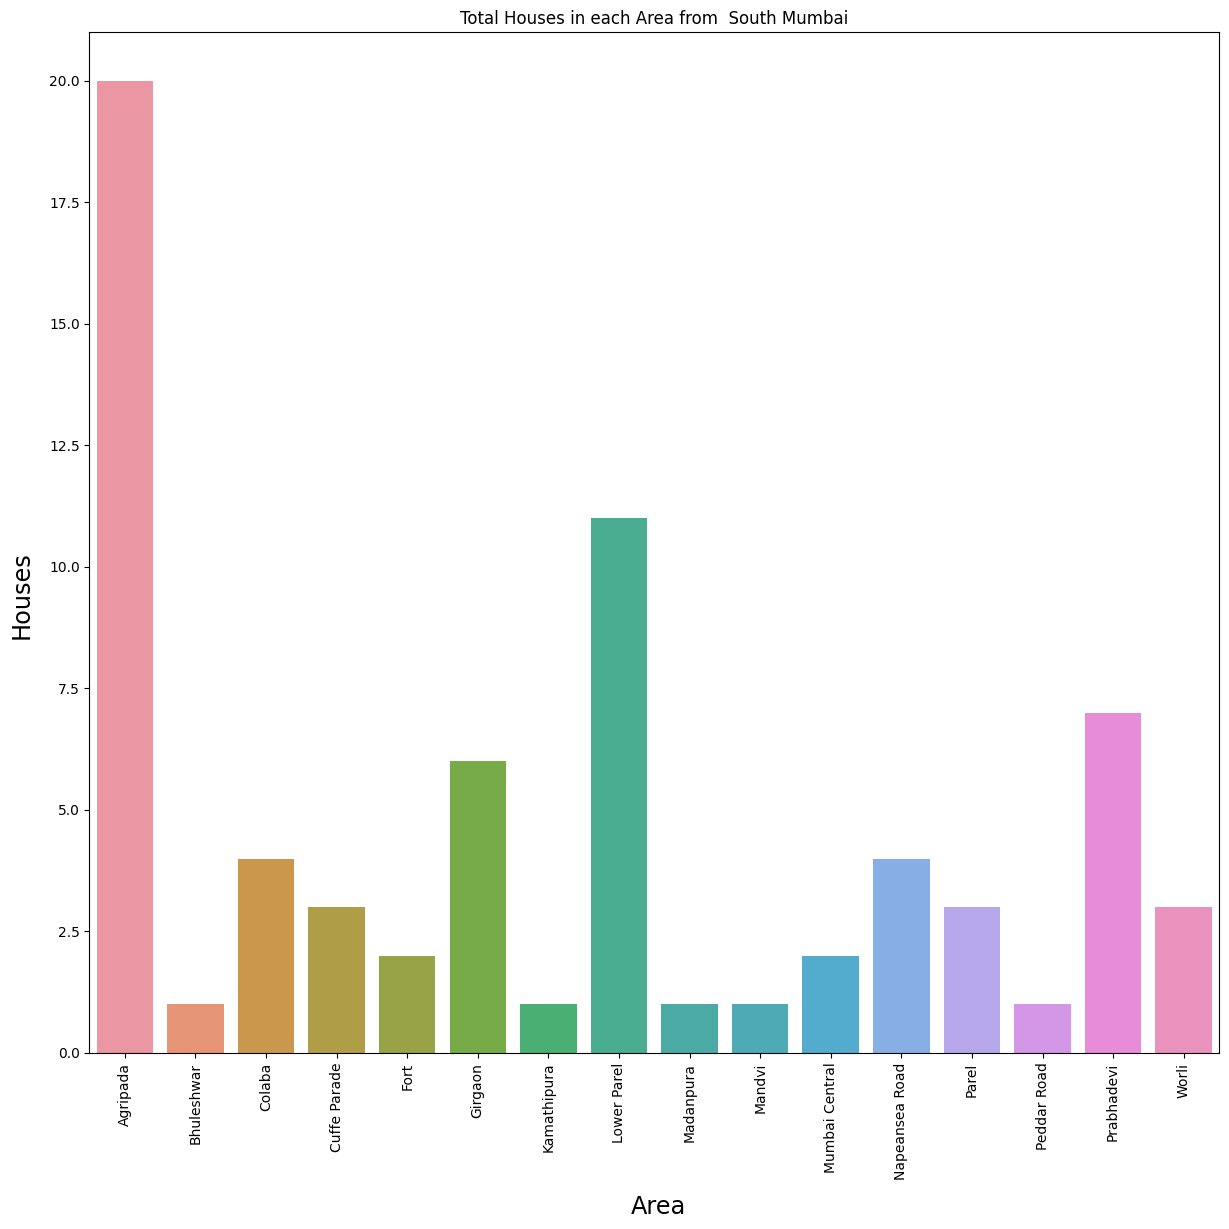

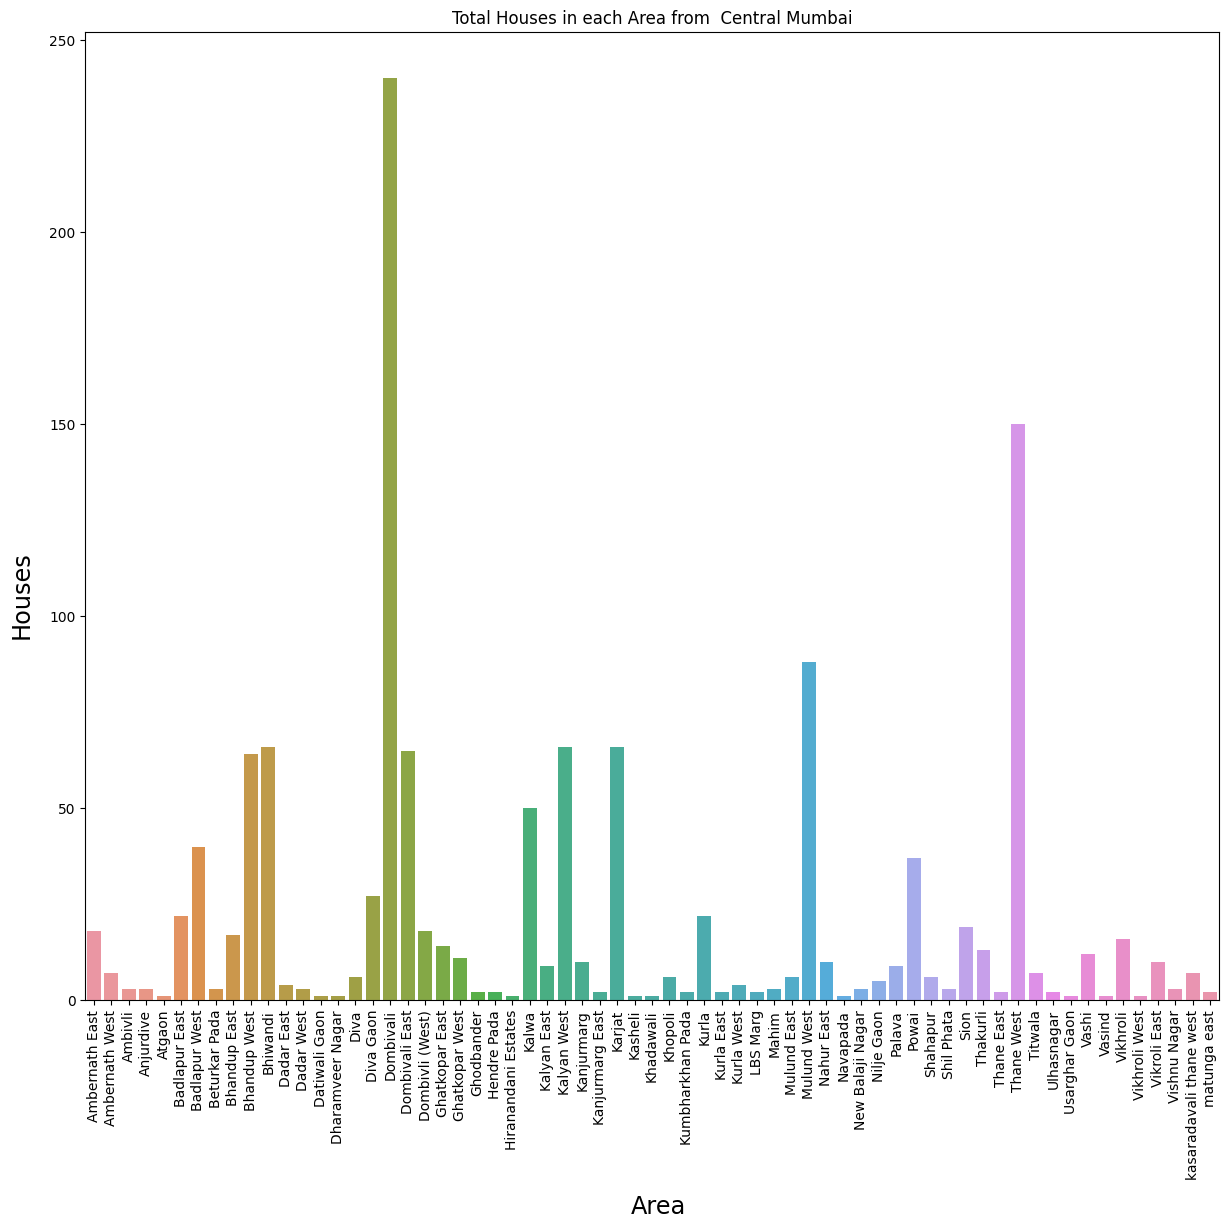

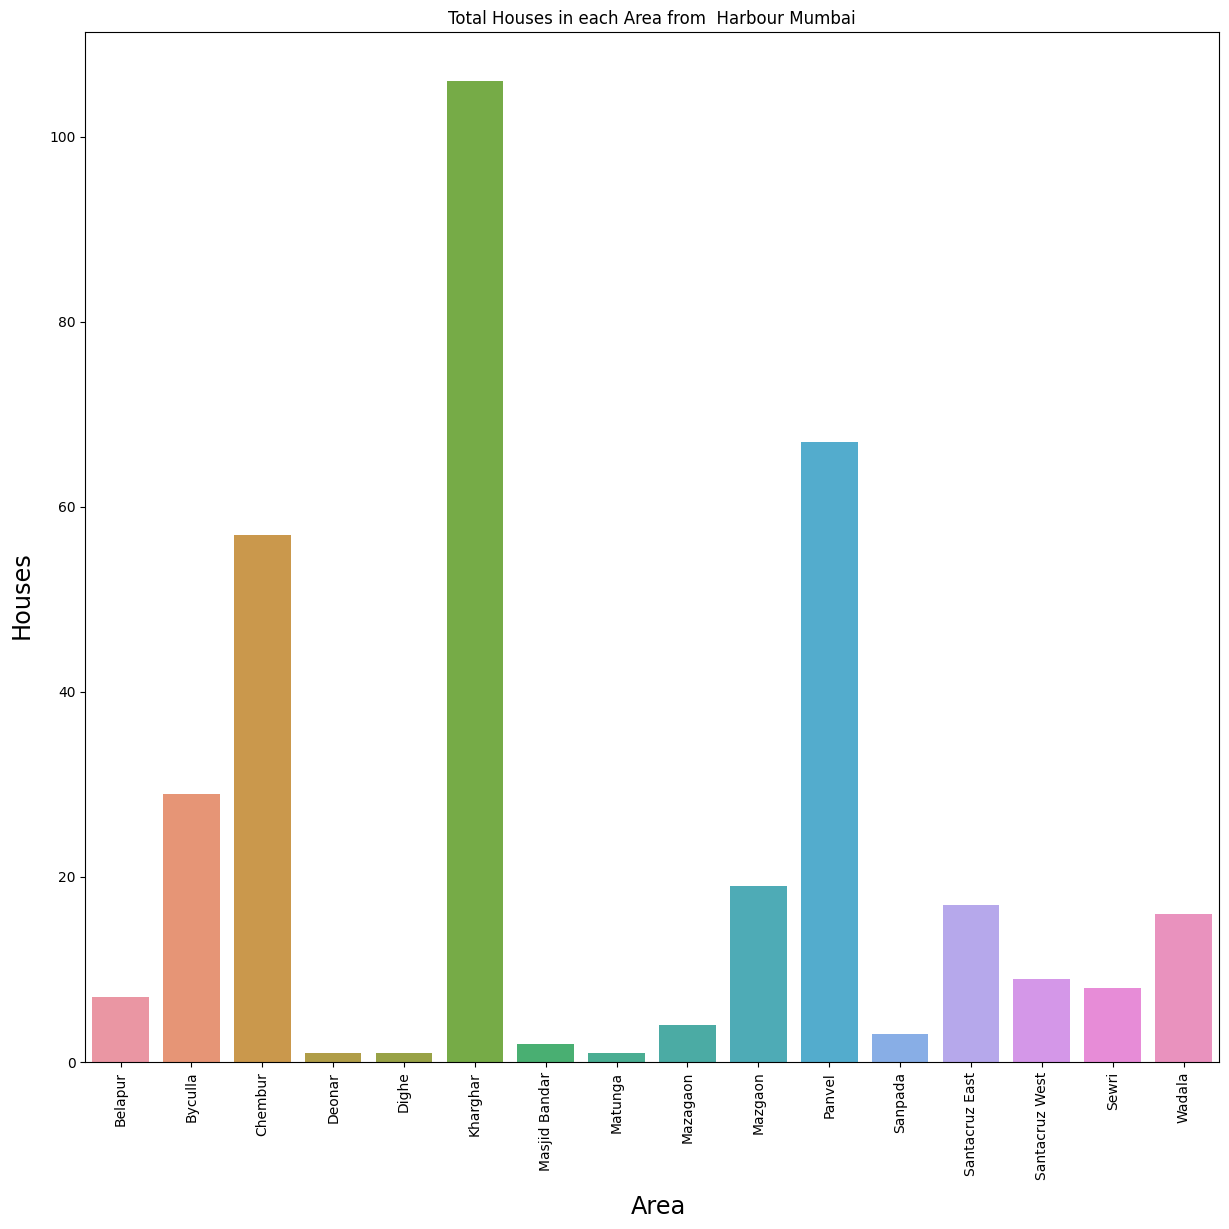

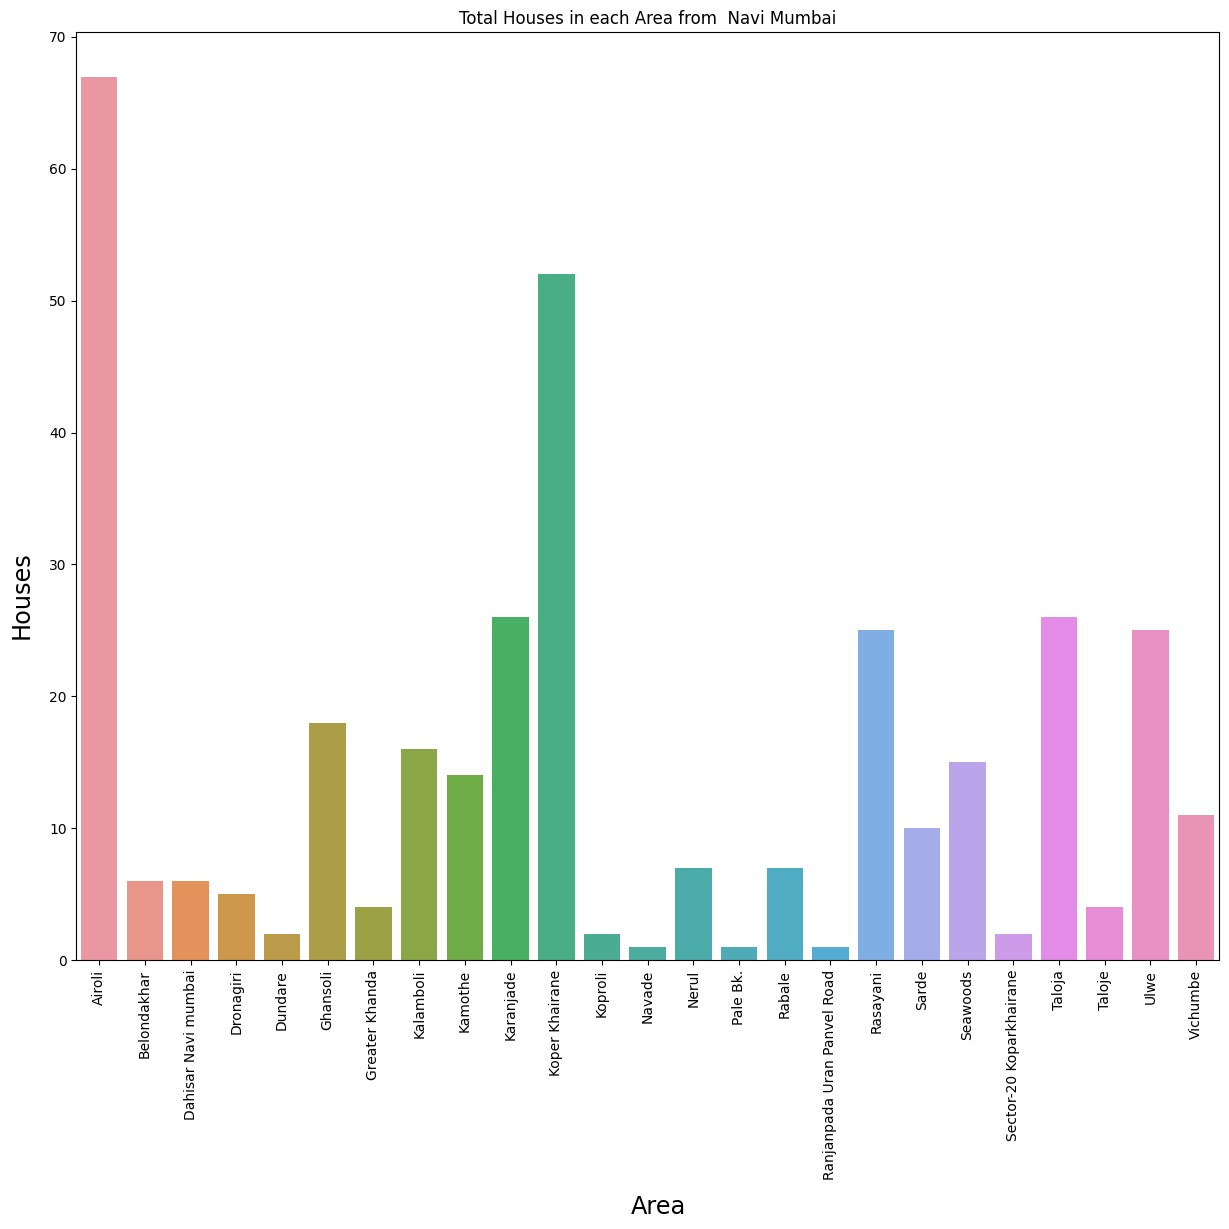

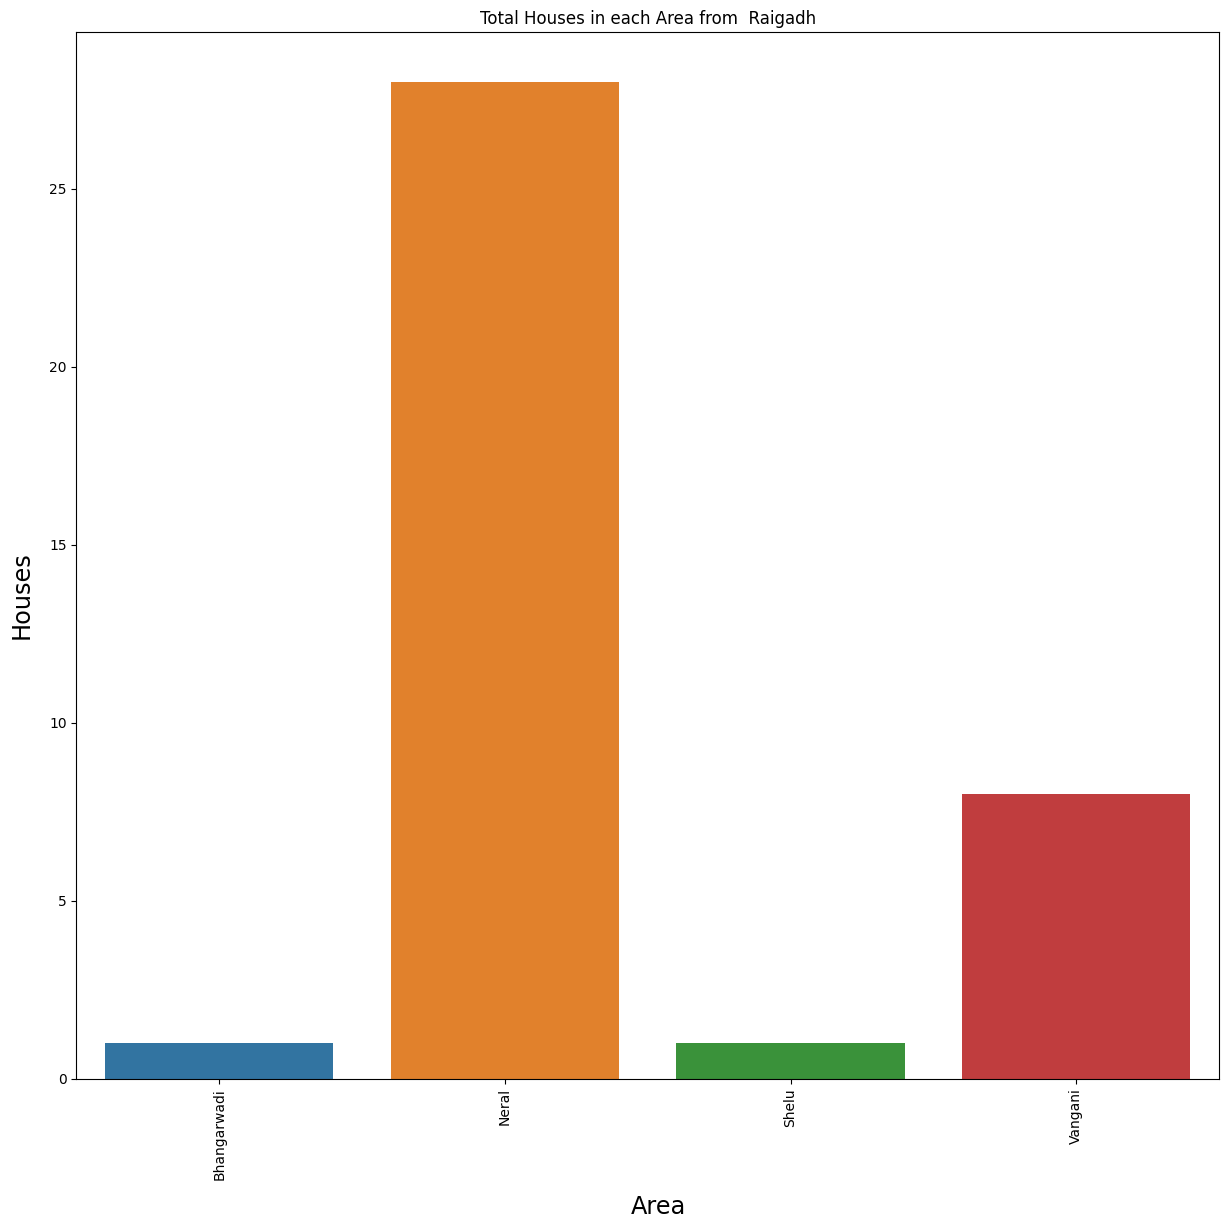

In [277]:
for region in range(len(Regions)):

    heights = []
    df_temp = DataFrames[region]
    areas = df_temp['Location'].unique()
    areas.sort()

    for loc in range(len(areas)):
        df_temp1 = df_temp[df_temp['Location'] == areas[loc]]
        heights.append(len(df_temp1))

    f=plt.figure(figsize=(12,12))
        
    ax = sns.barplot(x=areas,y=heights)
    ax.set(xlabel='')
    plt.title(region,weight='bold')

    #adding a common x and y label
    plt.xticks(range(len(heights)),areas, rotation='vertical')
    plt.title("Total Houses in each Area from  " + Regions[region])
    
    f.text(0.52,-0.01, "Area", ha="center", va="center",size='xx-large')
    f.text(-0.01,0.50, "Houses", ha="center", va="center", rotation=90,size='xx-large')

    plt.tight_layout()
    plt.show()   

## Plotting number of houses of different sizes in different regions

In [278]:
column_names=['regions','small','medium','large']
df_=pd.DataFrame(columns=column_names)
for index1 in range(0, len(Regions)):

    small_houses = 0
    medium_houses = 0
    large_houses = 0

    house_size = DataFrames[index1]['Total sqft'].to_list()

    mean_size = np.mean(house_size)
    std_size = np.std(house_size)

    for index2 in range(0, len(house_size)):
        if house_size[index2] <= 600:
            small_houses += 1
        elif (house_size[index2] > 600) and (house_size[index2] <= 1500):
            medium_houses += 1
        else:
            large_houses += 1
    
    print('Mean size of houses in ' + Regions[index1] + ' is ' + str(round(mean_size)) + ' sqft')

    print('Deviation in size of houses in ' + Regions[index1] + ' is ' + str(round(std_size)) + ' sqft')
    df2={'regions' : Regions[index1],'small' : small_houses,'medium' : medium_houses,'large' : large_houses}
    import warnings
    warnings.filterwarnings("ignore")
    df_=df_.append(df2,ignore_index=True)
display(df_)
    

Mean size of houses in North Mumbai is 926 sqft
Deviation in size of houses in North Mumbai is 844 sqft
Mean size of houses in South Mumbai is 1380 sqft
Deviation in size of houses in South Mumbai is 808 sqft
Mean size of houses in Central Mumbai is 804 sqft
Deviation in size of houses in Central Mumbai is 484 sqft
Mean size of houses in Harbour Mumbai is 1022 sqft
Deviation in size of houses in Harbour Mumbai is 513 sqft
Mean size of houses in Navi Mumbai is 891 sqft
Deviation in size of houses in Navi Mumbai is 444 sqft
Mean size of houses in Raigadh is 509 sqft
Deviation in size of houses in Raigadh is 280 sqft


,regions,small,medium,large
0,North Mumbai,447,1121,305
1,South Mumbai,9,38,23
2,Central Mumbai,472,751,76
3,Harbour Mumbai,62,233,52
4,Navi Mumbai,103,221,29
5,Raigadh,33,5,0


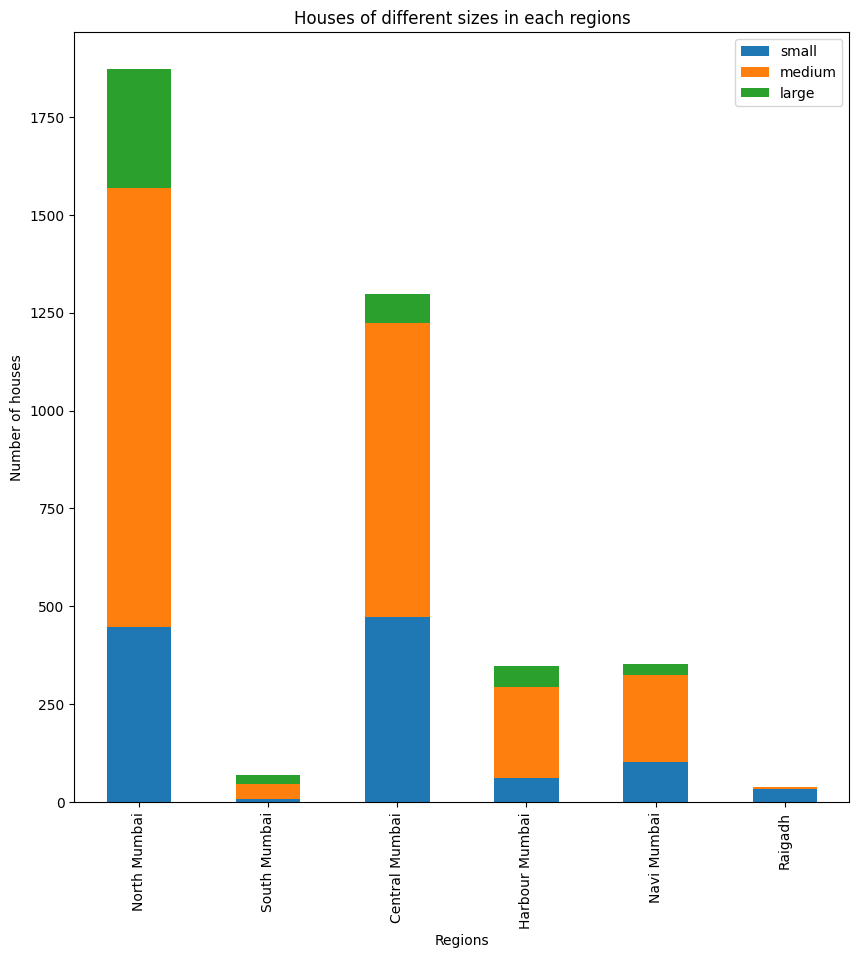

In [279]:
df_.plot(x='regions',kind='bar',stacked=True,figsize=(10,10),xlabel='Regions',ylabel='Number of houses',title='Houses of different sizes in each regions')
plt.show()

We can see that Raigadh's maximum houses are small. Rest have a common trend of maximum medium sized houses, followed by small sized and large sized are the least in numbers.

### Plotting barplot of number of houses with different prices/sqft in various Regions

In [280]:
column_names=['regions','Low Price/Sqft', 'Medium Price/Sqft', 'High Price/Sqft', 'Very High Price/Sqft']
df_=pd.DataFrame(columns=column_names)
for index1 in range(0, len(Regions)):

    low_price_sqft = 0
    medium_price_sqft = 0
    high_price_sqft = 0
    very_high_price_sqft = 0

    price_sqft = DataFrames[index1]['price_sqft'].to_list()

    mean_price_sqft = np.mean(price_sqft)
    std_price_sqft = np.std(price_sqft)

    for index2 in range(0, len(price_sqft)):
        if price_sqft[index2] <= 5000:
            low_price_sqft += 1
        elif (price_sqft[index2] > 5000) and (price_sqft[index2] <= 15000):
            medium_price_sqft += 1
        elif (price_sqft[index2] > 15000) and (price_sqft[index2] <= 25000):
            high_price_sqft += 1
        else:
            very_high_price_sqft += 1

    

    frequency = [low_price_sqft, medium_price_sqft, high_price_sqft, very_high_price_sqft]


    print('Mean price/sqft in ' + Regions[index1] + ' is ' + str(round(mean_price_sqft)) + ' Rupees')

    print('Deviation in price/sqft in ' + Regions[index1] + ' is ' + str(round(std_price_sqft)) + ' Rupees')

    df2={'regions' : Regions[index1],'Low Price/Sqft' : low_price_sqft,'Medium Price/Sqft' : medium_price_sqft,'High Price/Sqft' : high_price_sqft,'Very High Price/Sqft' : very_high_price_sqft }
    warnings.filterwarnings("ignore")
    df_=df_.append(df2,ignore_index=True)
display(df_)    
   

Mean price/sqft in North Mumbai is 11672 Rupees
Deviation in price/sqft in North Mumbai is 11022 Rupees
Mean price/sqft in South Mumbai is 35289 Rupees
Deviation in price/sqft in South Mumbai is 11603 Rupees
Mean price/sqft in Central Mumbai is 10444 Rupees
Deviation in price/sqft in Central Mumbai is 7135 Rupees
Mean price/sqft in Harbour Mumbai is 17732 Rupees
Deviation in price/sqft in Harbour Mumbai is 10843 Rupees
Mean price/sqft in Navi Mumbai is 9308 Rupees
Deviation in price/sqft in Navi Mumbai is 4995 Rupees
Mean price/sqft in Raigadh is 4677 Rupees
Deviation in price/sqft in Raigadh is 2708 Rupees


,regions,Low Price/Sqft,Medium Price/Sqft,High Price/Sqft,Very High Price/Sqft
0,North Mumbai,638,657,411,167
1,South Mumbai,0,0,20,50
2,Central Mumbai,305,741,204,49
3,Harbour Mumbai,21,155,86,85
4,Navi Mumbai,65,251,35,2
5,Raigadh,25,12,1,0


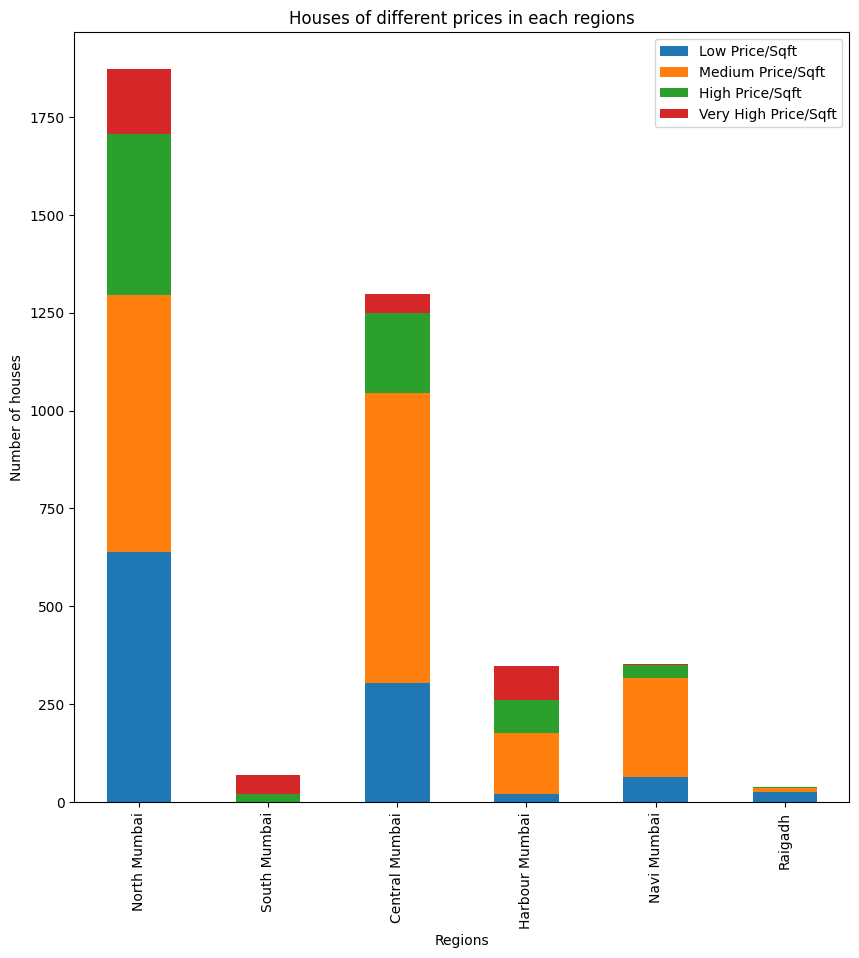

In [281]:
df_.plot(x='regions',kind='bar',stacked=True,figsize=(10,10),xlabel='Regions',ylabel='Number of houses',title='Houses of different prices in each regions')
plt.show()

South Mumbai has houses which lie only in high or very high price per sqft categories.

### Creating a user interactive interface to show dataframes according to user's choice

In [282]:
from IPython.display import clear_output

location = input('Hello! Let me help you find a house! Which is your preferred Location ?')
Locations = df['Location'].to_list()
found = False

for i in range(len(Locations)):
    if(Locations[i] == location):
        found = True

if(found):
    df_temp = df[df['Location'] == location]
    print("These are the available options for you :- ")
    display(df_temp)
else:
    print("Oops! No results found.")



no_of_BHK = int(input('How many BHK house do you want?'))
df_temp = df_temp[df_temp['BHK'] == no_of_BHK]

if len(df_temp['BHK'].to_list()) > 0:
    clear_output()
    print('You have the following options :-')
    display(df_temp)
else:
    clear_output()
    print("Oops! No results found")



price_limit = float(input('What is your price limit?(in Cr)'))

if(np.min(df_temp['price_in_Cr']) <= price_limit):
    df_temp = df_temp[df_temp['price_in_Cr'] <= price_limit]
    clear_output()
    print('There you go!')
    display(df_temp)
else:
    clear_output()
    print("Oops! No results found")

There you go!


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
69,3,SHREE KRISHNA SangamChembur,Chembur,917,31000,2.84
1618,3,Sandu ShilpadattaChembur,Chembur,1005,27888,2.80
1619,3,Sandu ShilpadattaChembur,Chembur,1005,27888,2.80


### Library import

In [283]:
import sklearn              # Importing Essential Library for Machine Learning

### Predictions possible for the following regions because of limited Data -
1. North Mumbai
2. Central Mumbai

## Linear Regression model for Prediction

In [284]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regions_predict = ['North Mumbai', 'Central Mumbai']
df_predict = [df_NM, df_CM]

df_NM.drop('project', axis=1,inplace=True)
df_NM.drop('Location', axis=1,inplace=True)
df_NM.drop('price_sqft', axis=1,inplace=True)

df_CM.drop('project', axis=1,inplace=True)
df_CM.drop('Location', axis=1,inplace=True)
df_CM.drop('price_sqft', axis=1,inplace=True)

for index in range(len(df_predict)):
    df_train = pd.DataFrame()

    df_temp = pd.DataFrame()

    df_validation = pd.DataFrame()

    df_test = pd.DataFrame()

    df_train, df_temp = train_test_split(df_predict[index], test_size = 0.3,shuffle=True)

    df_validation, df_test = train_test_split(df_temp, test_size = 0.5,shuffle=True)

    display(df_train)

    columns = df_train.columns.values

    df_train_normal = pd.DataFrame(preprocessing.normalize(df_train), columns=columns)

    df_validation_normal = pd.DataFrame(preprocessing.normalize(df_validation), columns=columns)

    df_test_normal = pd.DataFrame(preprocessing.normalize(df_test), columns=columns)

    means_train = df_train_normal['price_in_Cr'].to_list()
    means_validation = df_validation_normal['price_in_Cr'].to_list()
    means_test = df_test_normal['price_in_Cr'].to_list()

    df_train_normal.drop('price_in_Cr', axis=1,inplace=True)
    df_validation_normal.drop('price_in_Cr', axis=1,inplace=True)
    df_test_normal.drop('price_in_Cr', axis=1,inplace=True)

    model = LinearRegression().fit(df_train_normal, means_train)

    print('Region for which we are predicting:-', regions_predict[index])

    R_sq = model.score(df_train_normal, means_train)

    print('Training Accuracy = ', R_sq*100 , ' %')

    R_sq_validation = model.score(df_validation_normal, means_validation)

    print('Validation Accuracy = ', R_sq_validation*100, ' %')

    R_sq_test = model.score(df_test_normal, means_test)

    print('Testing Accuracy = ', R_sq_test*100, ' %')

    print('In the Decision Tree Model :')

    regressor = DecisionTreeRegressor(max_depth=7)
    regressor.fit(df_train_normal,means_train)
    print('Training Accuracy = ', regressor.score(df_train_normal,means_train)*100, ' %')

    print('Validation Accuracy = ', regressor.score(df_validation_normal, means_validation)*100,' %')
    print('Test Accuracy = ', regressor.score(df_test_normal, means_test)*100,' %' )
    print('In the Random Forest Model :')

    regr = RandomForestRegressor(max_depth=7,random_state=0)
    regr.fit(df_train_normal,means_train)

    print('Training Accuracy = ',regr.score(df_train_normal,means_train)*100, ' %')
    print('Validation Accuracy = ',regr.score(df_validation_normal, means_validation)*100, ' %')
    print('Test Accuracy = ',regr.score(df_test_normal, means_test)*100, ' %')

,BHK,Total sqft,price_in_Cr
2483,2,1000,1.80
3738,3,1300,1.40
726,1,651,0.20
3702,2,970,0.81
2484,3,1900,3.20
...,...,...,...
1482,5,1601,0.20
1581,1,380,0.38
2603,2,692,0.53
1995,2,955,1.07


Region for which we are predicting:- North Mumbai
Training Accuracy =  74.587034846342  %
Validation Accuracy =  74.06923918937089  %
Testing Accuracy =  74.47719877703192  %
In the Decision Tree Model :
Training Accuracy =  88.50718538999317  %
Validation Accuracy =  89.10727217992297  %
Test Accuracy =  86.45364866395344  %
In the Random Forest Model :
Training Accuracy =  95.29124918759841  %
Validation Accuracy =  95.52825119841428  %
Test Accuracy =  94.51974153851009  %


,BHK,Total sqft,price_in_Cr
1562,3,827,0.43
3380,3,1432,2.50
3719,1,520,0.80
2188,1,433,0.45
2589,2,850,0.92
...,...,...,...
3484,2,499,0.35
1028,1,712,0.43
3898,1,395,0.60
1641,2,1400,1.59


Region for which we are predicting:- Central Mumbai
Training Accuracy =  80.91377346334608  %
Validation Accuracy =  79.34669322194316  %
Testing Accuracy =  86.50201600250976  %
In the Decision Tree Model :
Training Accuracy =  60.38237714633172  %
Validation Accuracy =  40.361151456666  %
Test Accuracy =  60.81321101203741  %
In the Random Forest Model :
Training Accuracy =  81.6672955736908  %
Validation Accuracy =  77.5287833702714  %
Test Accuracy =  82.24724995257785  %


## Conclusions

1. Even though the Data size is relatively small, linear Regression allows us to predict the price of the house of a fixed number of BHK in a particular area with an accuracy of about 75 to 80 percent.
2. Linear regression is a fantastic model for House prices prediction when we have large data with lots of attributes
3. Random Forest algorithm best predicts the price of houses in Mumbai

## Spearman Correlation Test

### Finding Mathematical Correlation between total area in sqft and total price in Crores

In [285]:
from scipy.stats import spearmanr

area = pd.DataFrame()
total_price = pd.DataFrame()
price_per_sqft = pd.DataFrame()

area = df['Total sqft']
total_price = df['price_in_Cr']*(10**7)
price_per_sqft = df['price_sqft']

correlation, pvalue = spearmanr(area, total_price)

print('The results of the spearman correlation test for columns total sqft and total price in Crores are as follows:- ')
print('Correlation = ', correlation)
print('pvalue = ', pvalue)

The results of the spearman correlation test for columns total sqft and total price in Crores are as follows:- 
Correlation =  0.42300525016257395
pvalue =  1.4921108536802424e-172


### Finding Mathematical Correlation between total area in sqft and  price per sqft

In [286]:
correlation, pvalue = spearmanr(area, price_per_sqft)

print('The results of the spearman correlation test for columns total sqft and  price per sqft are as follows:- ')
print('Correlation = ', correlation)
print('pvalue = ', pvalue)

The results of the spearman correlation test for columns total sqft and  price per sqft are as follows:- 
Correlation =  0.04314356665088891
pvalue =  0.006484474018448349


### Finding Mathematical Correlation between total price in Crores and  price per sqft

In [287]:
correlation, pvalue = spearmanr(total_price, price_per_sqft)

print('The results of the spearman correlation test for columns total price in Crores and  price per sqft are as follows:- ')
print('Correlation = ', correlation)
print('pvalue = ', pvalue)

The results of the spearman correlation test for columns total price in Crores and  price per sqft are as follows:- 
Correlation =  0.8979163871883951
pvalue =  0.0


## Conclusions

1. The results of the Spearmann correlation test for all 3 pairs of attributes clearly suggest that there is correlation between attributes.
2. Very Strong Correlation - total price and price per sqft, total area and total price
3. Good Correlation - total area and price per sqft